In [43]:
import ir_datasets
import pandas as pd

dataset = ir_datasets.load("cord19")

data = []

for doc in dataset.docs_iter()[:20000]:  
 
    data.append({
        "doc_id": doc.doc_id,
        "title": doc.title,
        "doi": doc.doi,
        "date": doc.date,
        "abstract": doc.abstract
    })

df = pd.DataFrame(data)

df = df[df["abstract"] != ""]
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

Dataset saved to covid_dataset.csv


## Context

The objective of the project is to do an information search system, including work on data collection and preparation, information querying and retrieval, and retrieval evaluation. In this part, the focus is on the preparation and characterisation of the data set, in order to guarantee the quality of the data and have a better understanding of it.

The dataset used is a collection of scientific articles related to COVID-19. It uses the 2020-07-16 version of the dataset, corresponding to the "complete" collection used for TREC COVID.

## Data Sources

### Description

The [COVID-19 Open Research Dataset (CORD-19)](https://github.com/allenai/cord19) is a freely available resource of over 100,000 scholarly articles about COVID-19, SARS-CoV-2, and related coronaviruses. The dataset was developed by the Allen Institute for AI in collaboration with several organizations, including the White House, NIH, and leading research groups. Its goal is to facilitate the development of new tools and technologies to help researchers find relevant information about the virus and its spread, and to support the global research community in the fight against the pandemic. It was first published in March 2020 and has been updated weekly since then until May 2nd 2022.

### Characteristics

The dataset can be obtained in various formats, including JSON, CSV. It contains metadata for each article, such as the id of the document, title, abstract, publication date. It has about 193,000 articles with a total size of 3.7GB since it uses the version of 16-07-2020. Some of these articles have missing abstracts or share the same title. This can happen because the dataset is a collection of articles from different sources, and some of them may have been published in more than one place.

## Characterization


### Collection Characterization
The data set consists of abstracts of articles published on the covid, has the following attributes:
- `doc_i`: Document identifier
- `title`: Article title
- `doi`: Digital Object Identifier (DOI)
- `date`: Publication date
- `abstract`: Article abstract


We selected approximately 20000 rows from the original dataset for our analysis.




### Document Presentation
An example of the data from our dataset is shown below:

In [10]:
df.head(5)

### Removing Rows with Invalid Data Formats

In [11]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(f"Original number of rows: {len(df)}")

df = df.dropna(subset=['date'])
print(f"Number of rows after removing NaT entries: {len(df)}")

### Exploratory Data Analysis
#### title

In [12]:
distinct_titles = df['title'].nunique()
total_titles = df['title'].count()

percentage_unique = (distinct_titles / total_titles) * 100

print(f"The dataset contains {percentage_unique:.1f}% unique titles.")

#### date

In [13]:
distinct_dates = df['date'].nunique()
total_dates = df['date'].count()

percentage_unique = (distinct_dates / total_dates) * 100

print(f"The dataset contains {percentage_unique:.1f}% unique dates.")

In [14]:
min_date = df['date'].min()
max_date = df['date'].max()

diff_years = round((max_date - min_date).days / 365.25)
min_date_year = min_date.year
max_date_year = max_date.year

print(f"Documents span from {min_date_year} to {max_date_year}, a total of {diff_years} years.")

In [15]:
import matplotlib.pyplot as plt

df['year'] = df['date'].dt.year
documents_per_year = df.groupby('year').size()

plt.figure(figsize=(10,6))
documents_per_year.plot(kind='bar')
plt.title('Number of Documents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Documents')
plt.show()

#### abstract

In [16]:
df['word_count_abstract'] = df['abstract'].apply(lambda x: len(str(x).split()))
average_word_count = round(df['word_count_abstract'].mean())
print(f"The abstracts of the documents in the dataset contain an average of {average_word_count} words.")

In [25]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') 

import spacy

### Text Analysis

In [42]:
from string import punctuation

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')

np = [
    ''.join([char for char in abs if char not in punctuation])
    for abs in df["abstract"]
]
print(np[:5])

token_abs = [word_tokenize(abs) for abs in np]
print(token_abs[:5])

abs_nstp = [
    ' '.join([word.lower() for word in abs if word.lower() not in stop_words])
    for abs in token_abs
]
print(abs_nstp[:5])

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
abs_lem = [
    ' '.join([lemmatizer.lemmatize(word) for word in abs.split()])
    for abs in abs_nstp
]
print(abs_lem[:5])

df['lem_abstract'] = abs_lem

df.to_csv("covid_dataset_preprocessed.csv", index=False)
print(df.head(5))

#### Word Cloud

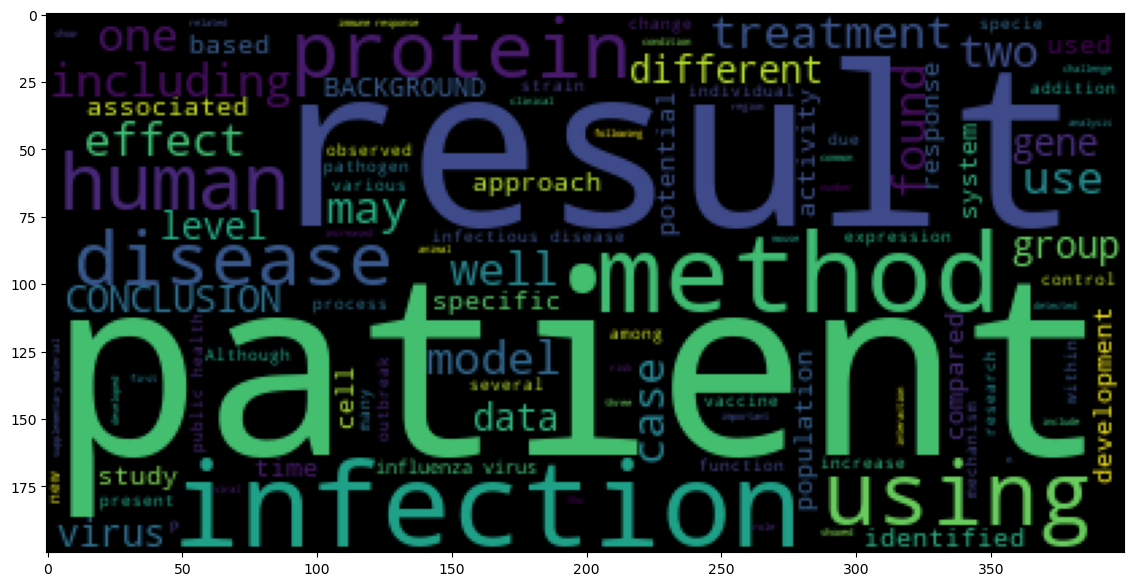

In [20]:
import numpy as np
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wc = WordCloud(
    background_color='black',
    max_words=100,
    random_state=44,
    max_font_size=110
)
wc.generate(' '.join(df['lem_abstract']))
plt.figure(figsize=(50, 7))
plt.imshow(wc)
plt.show()





## Prospective Search Task

### Description

The aim of this project is to build an information retrieval system that can effectively search and retrieve relevant scientific articles on COVID. The system should handle multiple query types across various topics and provide comprehensive results. Below are the key search tasks:

### Search Tasks

1. **COVID Types and Variants**  
   Retrieve articles on different types and variants of the COVID virus, including their mutations and genomic information.

2. **Epidemiology and Transmission**  
   Provide information on the spread of COVID, its transmission routes, and epidemiological patterns.

3. **Clinical Features and Diagnosis**  
   Focus on articles related to the symptoms, diagnostic criteria, and clinical presentation of COVID.

4. **Treatment and Management**  
   Retrieve information on therapeutic strategies, clinical management of COVID cases, and recovery protocols.

5. **Vaccines and Therapeutics**  
   Search for studies and reports on vaccine development, efficacy, distribution, and the use of therapeutic drugs.

6. **Public Health and Social Measures**  (maybe to remove)
   Provide research articles related to public health interventions, social measures, policy responses, and their effectiveness in controlling the pandemic.

### Information Needs

Each task requires the system to address a range of informations:
- Emerging COVID variants
- Vaccine side effects and immunity
- Long-term effects of COVID on public health
- Efficacy of different treatment protocols
- Social and economic impact of containment measures
